<a href="https://colab.research.google.com/github/lorenzosteccanella/HRL-MDP/blob/main/Example_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A simple example on how to learn a representation on the Nine Rooms environment

In [ ]:
# only required to run this notebook on COLAB

!git clone https://github.com/lorenzosteccanella/HRL-MDP.git
!cd HRL-MDP && ls && pip install -r requirements.txt
%cd HRL-MDP

In [14]:
import numpy as np
from utils import Random_traj_env, representation_score, wandb_plot
from model import SoftClusterNetwork
from torch import optim
import torch
import matplotlib.pyplot as plt

In [15]:
config = {
    "seed": 0,
    "env": "MiniGrid-NineRoomsDet-v0",
    "load_data": False,
    "p_random_action": 0,
    "max_len_episode": 100,
    "pos_or_image": "image",
    "n_episodes_env": 1000,
    "n_abstract_states": 9,
    "width": 19,
    "height": 19,
    "lr": 1e-4,
    "epochs": 5000,
    "batch_size": 32,
    "wl1": 1,
    "wl2": 0.4,
    "wl3": 0.1
}

In [16]:
# First let's collect some random trajectory data
memory, trajectories_dataset, print_states, annotations = Random_traj_env(config)


/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


loaded environment
collecting data


100%|██████████| 1000/1000 [18:49<00:00,  1.13s/it]


tot_n_steps_in_the_env:  101000
total_len_dataset_trajectories = 1000
experience_replay_size = 101000


In [17]:
# set seed
torch.manual_seed(config["seed"])
np.random.seed(config["seed"])

# # # Training the network
network = SoftClusterNetwork(config["n_abstract_states"], config["width"], config["height"])
optimizer = optim.AdamW(network.parameters(), lr=config["lr"])


Epoch 0, Loss: (-0.6022342443466187, 0.07183151692152023, -2.1944663524627686, 2.037208080291748)


/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/content/HRL-MDP/utils.py:926: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  a_s_room = network.pred(torch.FloatTensor(room_img), 1).detach().numpy()


Error: 305.5761184367447, Squared Error: 420.67232978797495, Abs Error: 442.80563516169786


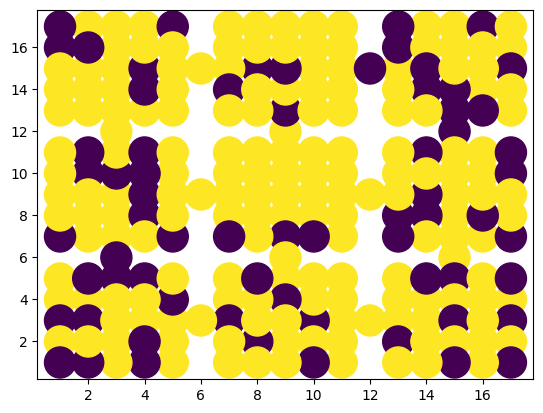

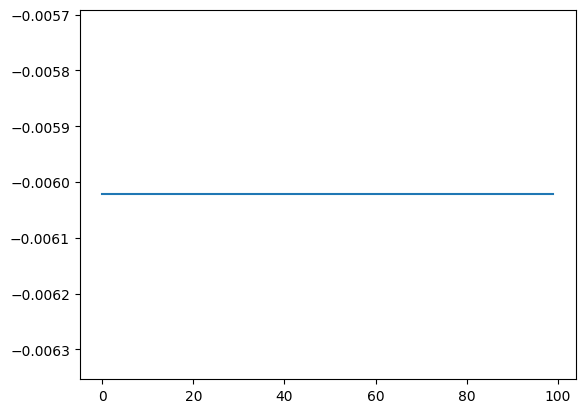

Epoch 100, Loss: (-0.7886276245117188, 0.03028387390077114, -2.175232172012329, 0.5118140578269958)
Error: 174.93954126280002, Squared Error: 214.68448178277978, Abs Error: 261.20970979807316


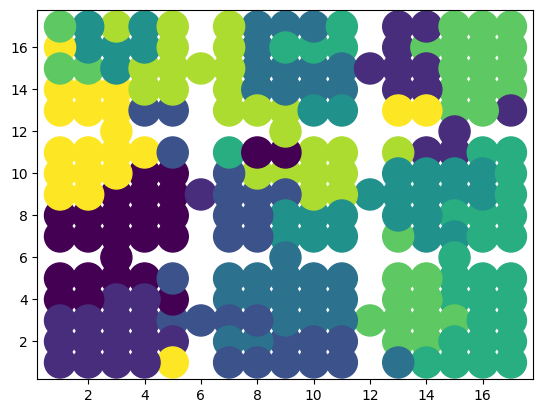

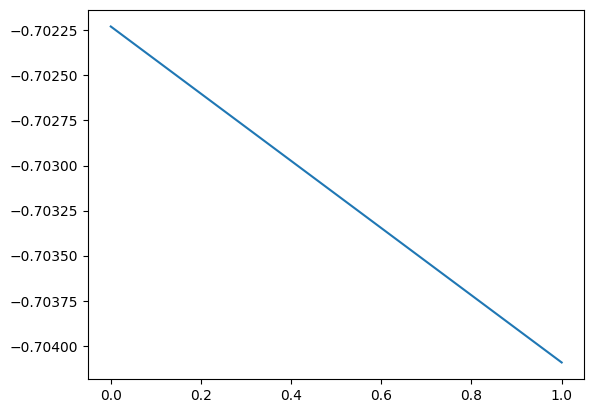

Epoch 200, Loss: (-0.7881350517272949, 0.0362311489880085, -2.174787998199463, 0.4554899036884308)
Error: 163.84905259017455, Squared Error: 212.07376639436185, Abs Error: 238.25452898885123


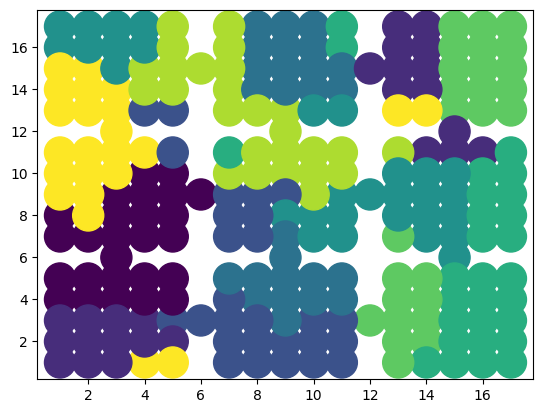

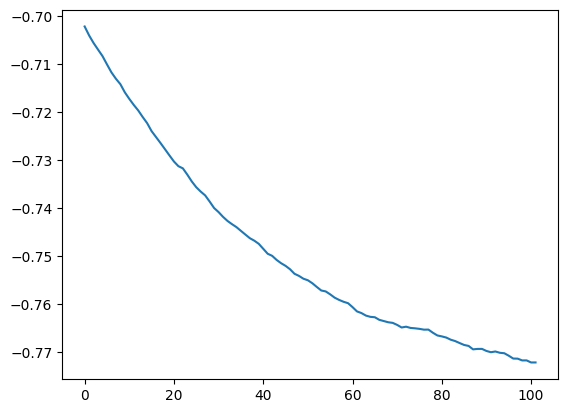

Epoch 300, Loss: (-0.8074502348899841, 0.01914309896528721, -2.1347291469573975, 0.2729833126068115)
Error: 145.76311799303645, Squared Error: 186.38909717634107, Abs Error: 212.74049975935486


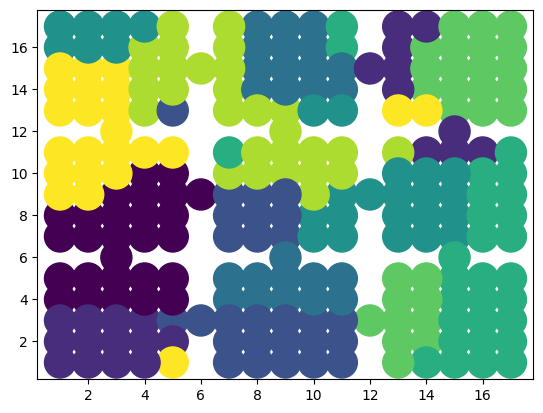

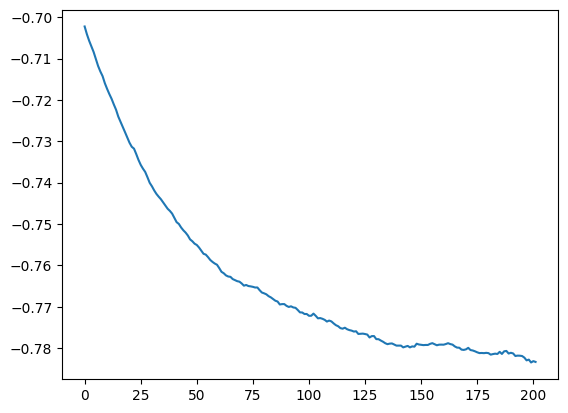

Epoch 400, Loss: (-0.8083735704421997, 0.022393276914954185, -2.137103319168091, 0.24074475467205048)
Error: 166.41887233955478, Squared Error: 220.97568705029764, Abs Error: 238.97968315109028


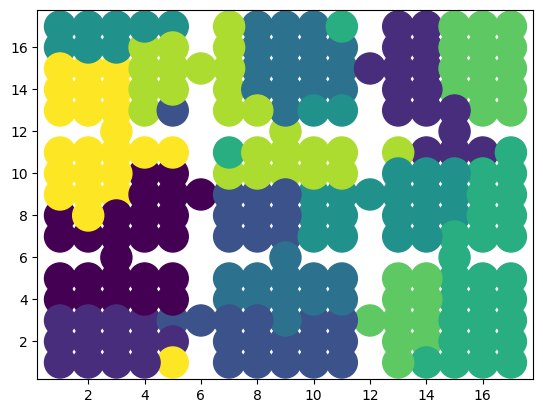

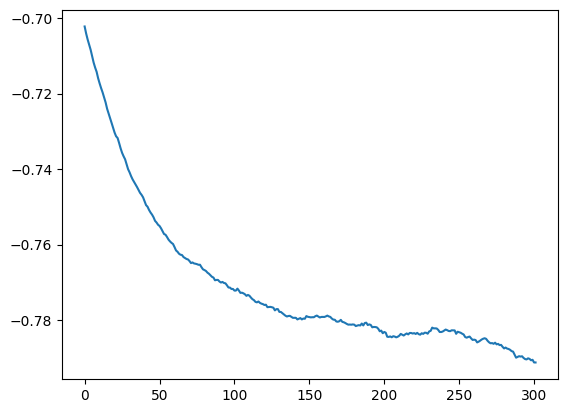

Epoch 500, Loss: (-0.8351251482963562, 0.0116140590980649, -2.1638944149017334, 0.18818536400794983)
Error: 166.16582212864859, Squared Error: 221.32374518307543, Abs Error: 237.62943612974777


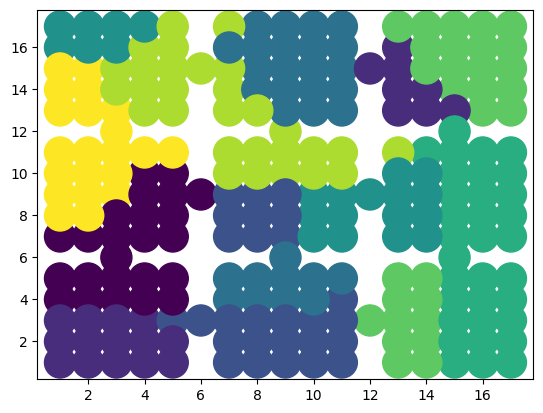

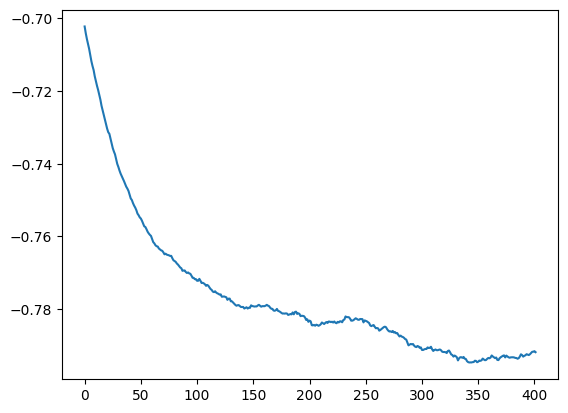

Epoch 600, Loss: (-0.7911510467529297, 0.02896098978817463, -2.1066794395446777, 0.22559770941734314)
Error: 150.51596305304543, Squared Error: 198.6571652198978, Abs Error: 215.6042193242538


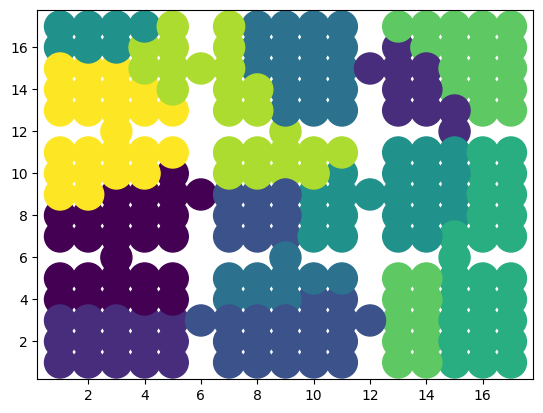

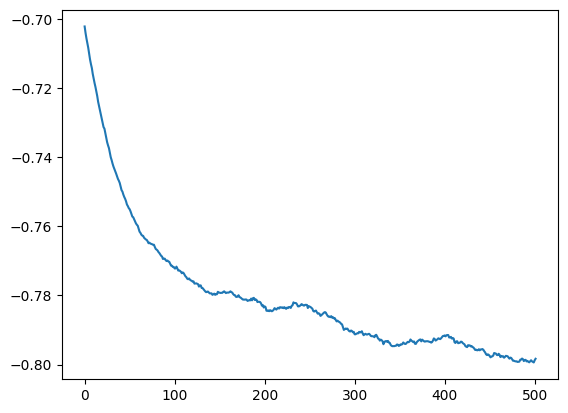

Epoch 700, Loss: (-0.8091269731521606, 0.020285893231630325, -2.137122392654419, 0.2543611526489258)
Error: 162.10549964066607, Squared Error: 217.73928922789923, Abs Error: 230.9296493914262


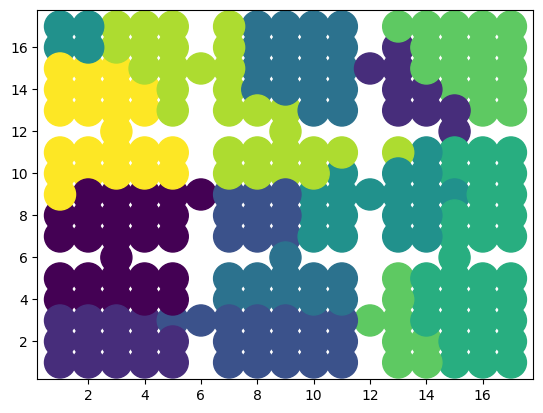

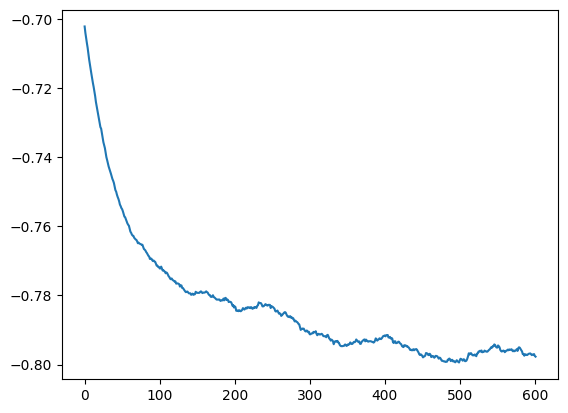

Epoch 800, Loss: (-0.7993829250335693, 0.012585567310452461, -2.0824456214904785, 0.21009747684001923)
Error: 118.5652136088223, Squared Error: 152.00580736634038, Abs Error: 169.58594190981603


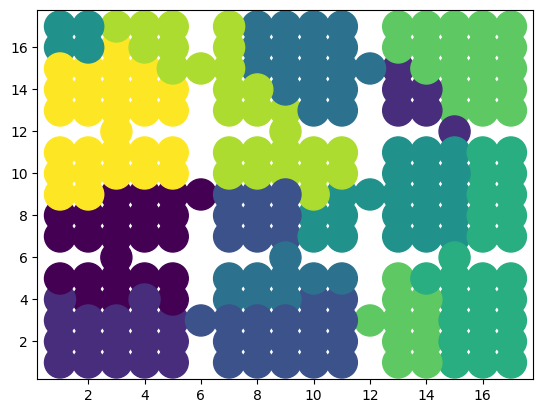

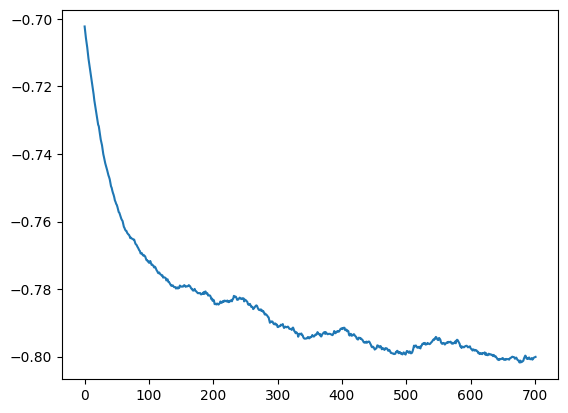

Epoch 900, Loss: (-0.7852051854133606, 0.022128073498606682, -2.0697929859161377, 0.20583994686603546)
Error: 137.14842076456387, Squared Error: 179.95793553959183, Abs Error: 195.79004626399183


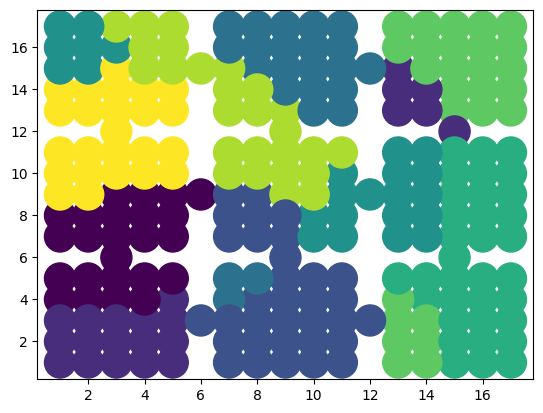

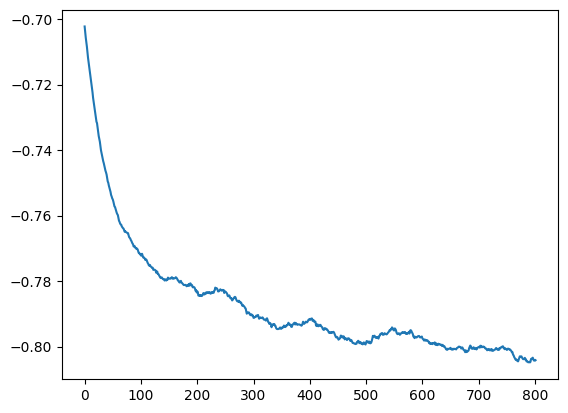

Epoch 1000, Loss: (-0.7872218489646912, 0.01460367813706398, -2.0521421432495117, 0.19031348824501038)
Error: 122.72954656316699, Squared Error: 157.8881289159031, Abs Error: 175.35108219435642


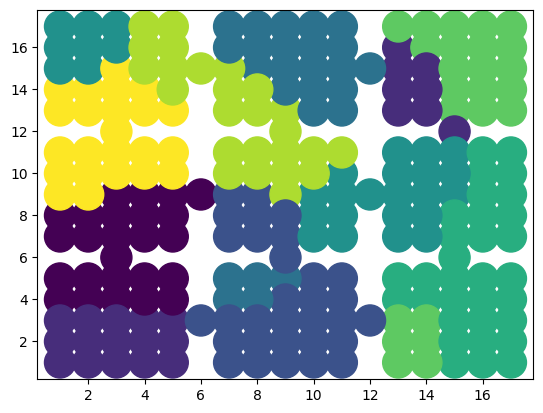

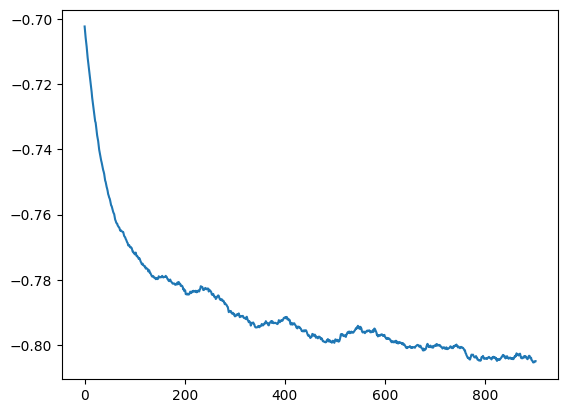

Epoch 1100, Loss: (-0.8029218316078186, 0.012723705731332302, -2.08040714263916, 0.16517363488674164)
Error: 114.08026193054998, Squared Error: 147.41053691921562, Abs Error: 162.60895958184847


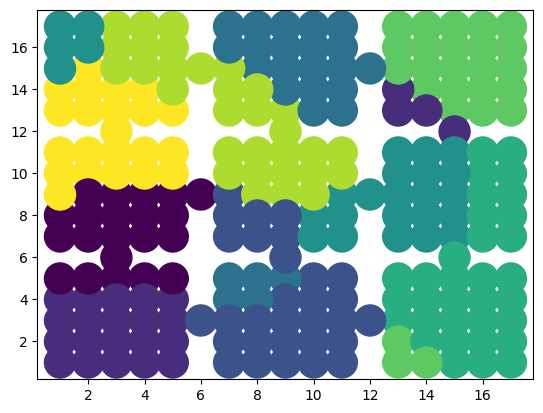

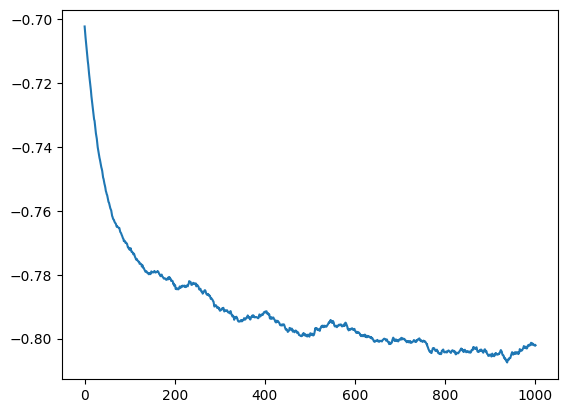

Epoch 1200, Loss: (-0.8074724078178406, 0.028800249099731445, -2.133481740951538, 0.17120087146759033)
Error: 75.75326695080265, Squared Error: 91.3651610873996, Abs Error: 109.04477544255224


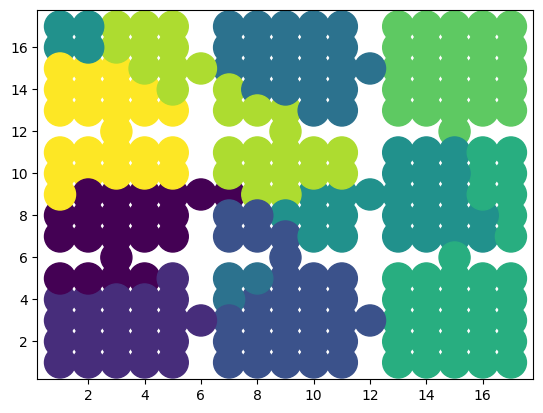

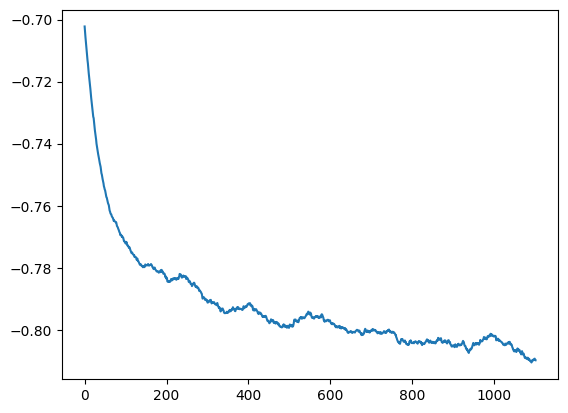

Epoch 1300, Loss: (-0.7805371880531311, 0.01693124882876873, -2.054619312286377, 0.24379341304302216)
Error: 93.73491358540954, Squared Error: 122.39451820755818, Abs Error: 133.6924945534588


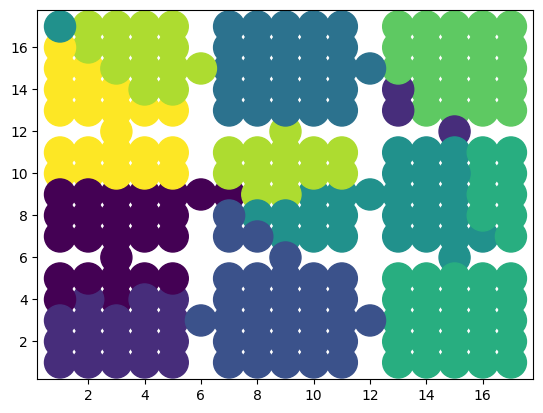

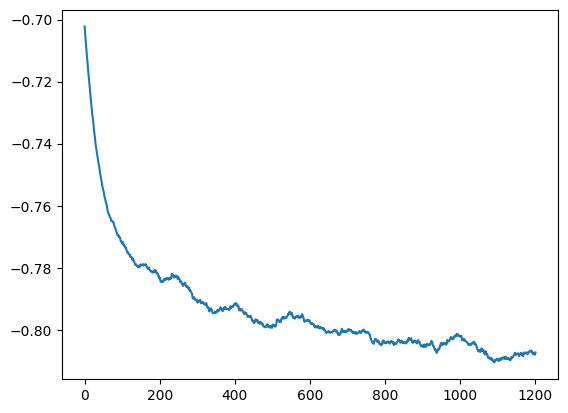

Epoch 1400, Loss: (-0.8301975131034851, 0.009283934719860554, -2.1414339542388916, 0.17092086374759674)
Error: 55.12877555649186, Squared Error: 66.95271716872861, Abs Error: 79.42592160330605


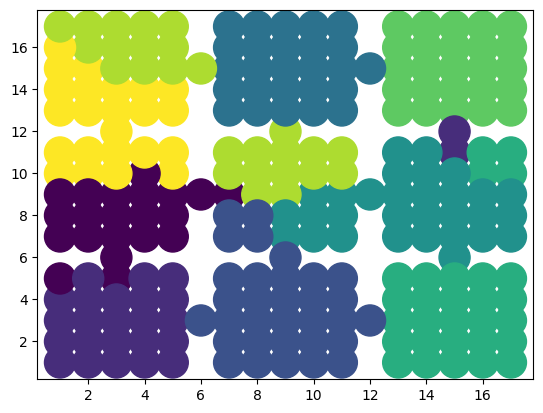

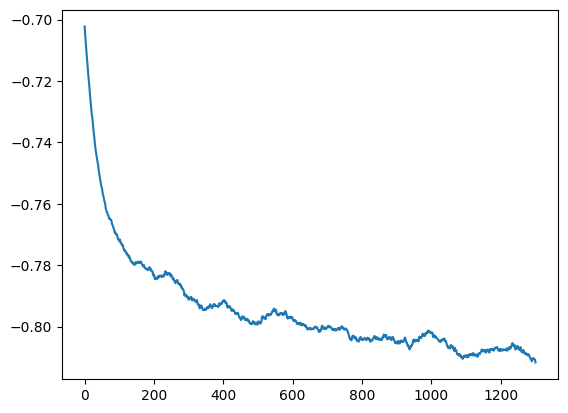

Epoch 1500, Loss: (-0.7618765830993652, 0.013462361879646778, -1.980681300163269, 0.16933570802211761)
Error: 31.029680770598024, Squared Error: 32.38977788265494, Abs Error: 44.700717321831235


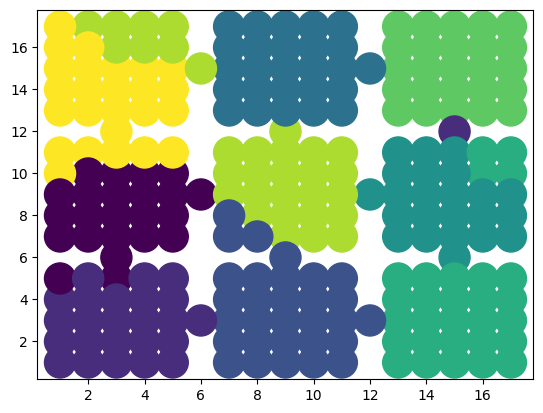

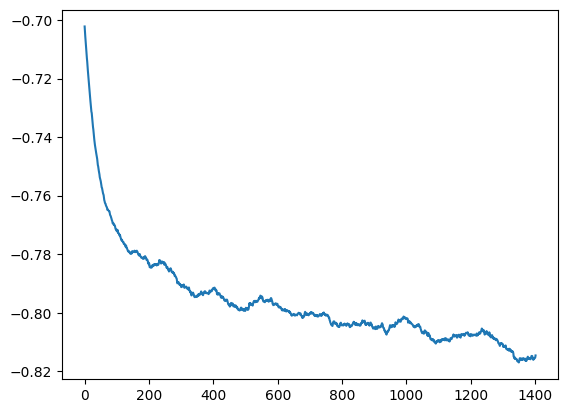

Epoch 1600, Loss: (-0.8225616812705994, 0.010378102771937847, -2.1054985523223877, 0.09259621798992157)
Error: 15.980990219081818, Squared Error: 15.080166438439573, Abs Error: 23.07922396246522


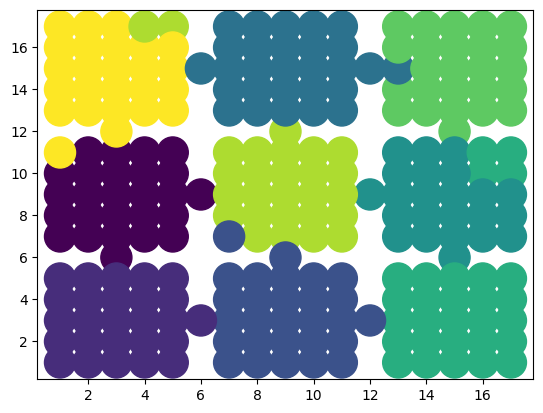

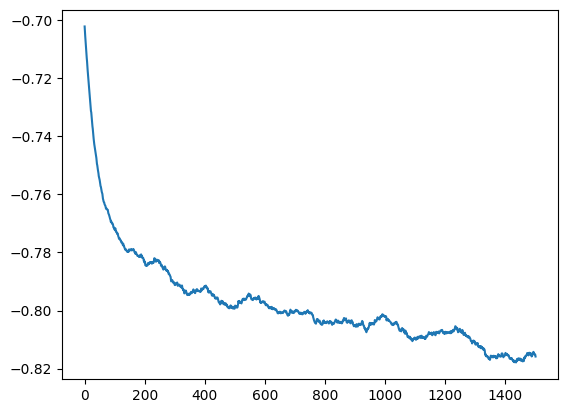

Epoch 1700, Loss: (-0.8120466470718384, 0.00516244163736701, -2.0713071823120117, 0.11313791573047638)
Error: 9.409537658092784, Squared Error: 7.196970280335995, Abs Error: 13.746562001671919


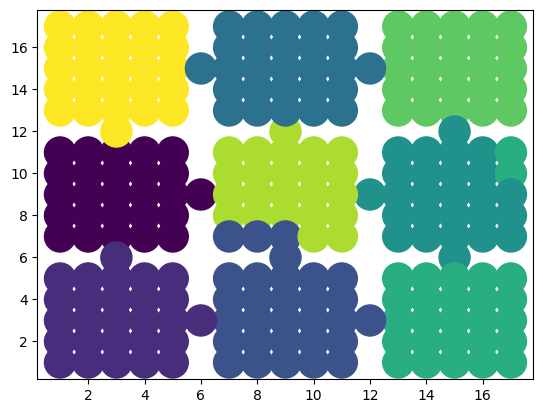

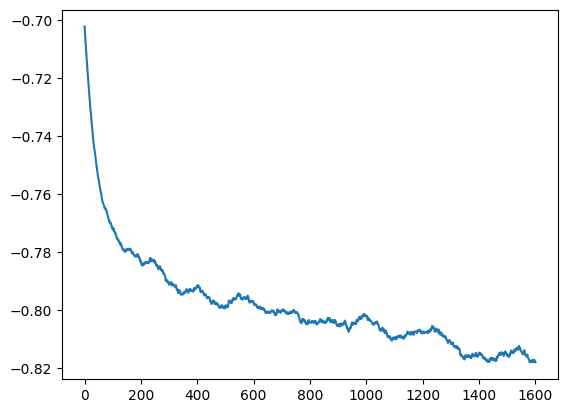

Epoch 1800, Loss: (-0.7615640759468079, 0.001970460405573249, -1.9227279424667358, 0.0555664487183094)
Error: 2.8596585417877165, Squared Error: 0.6144258172721431, Abs Error: 4.326925272937842


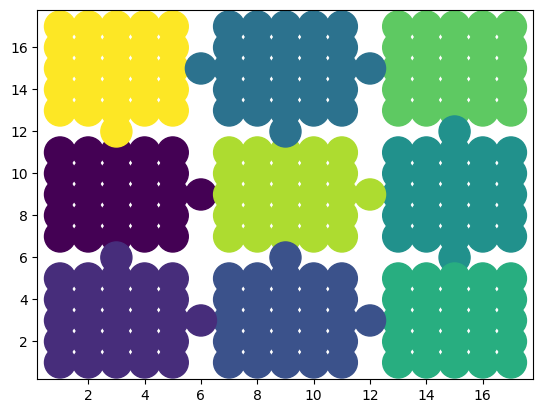

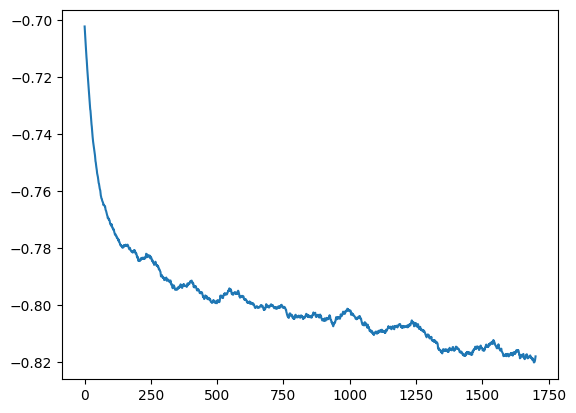

Epoch 1900, Loss: (-0.8258422613143921, 0.001966202398762107, -2.082749128341675, 0.05291227623820305)
Error: 6.986951822912865, Squared Error: 3.9276689806420313, Abs Error: 10.21344969886286


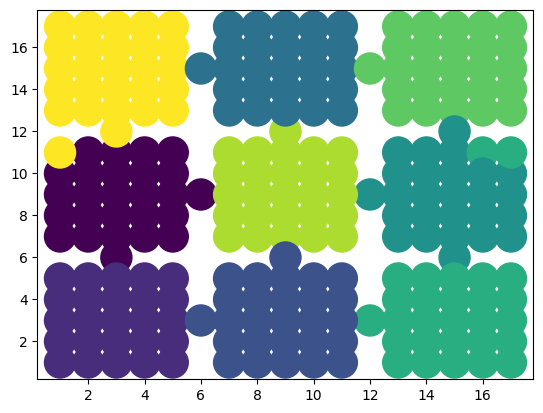

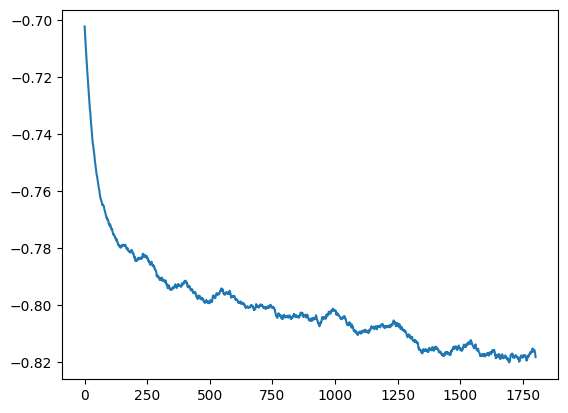

Epoch 2000, Loss: (-0.8490151166915894, 0.005291397217661142, -2.151498317718506, 0.06292815506458282)
Error: 3.2749763774202827, Squared Error: 0.8553127153929986, Abs Error: 4.8626378384060445


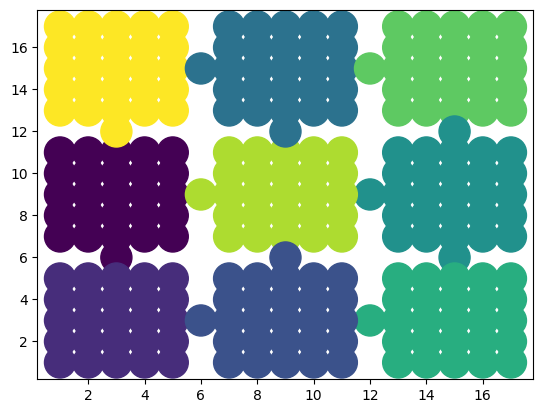

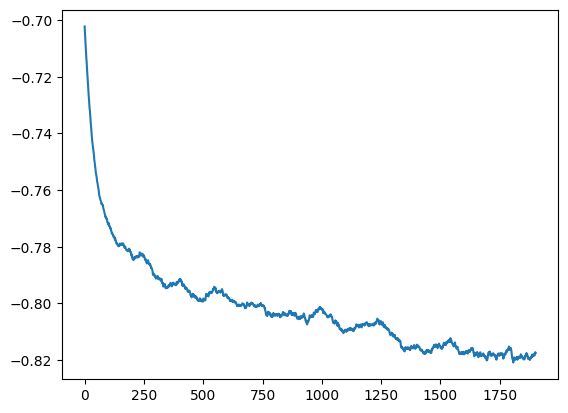

KeyboardInterrupt: 

In [18]:
losses = []
for i in range(config["epochs"]):
    network.train()
    idx, batch_x1, batch_x2, b_is_weights = memory.sample(config["batch_size"])
    x1 = torch.stack(batch_x1)
    x2 = torch.stack(batch_x2)
    z1 = network.pred(x1, 1)
    z2 = network.pred(x2, 1)
    compression_loss = ((-(z1 * z2.log())).sum(axis=1)).mean(axis=0)
    compression_loss = compression_loss / config["batch_size"]
    entropy_loss = (z1.mean(dim=0) * (z1.mean(dim=0).log())).sum()
    det_entropy_loss = (- (z1 * z1.log()).sum(dim=1)).mean()
    loss = config["wl1"] * compression_loss + config["wl2"] * entropy_loss + config["wl3"] * det_entropy_loss
    losses.append(loss.item())

    if i % 100 == 0:
        print(f"Epoch {i}, Loss: {loss.item(), compression_loss.item(), entropy_loss.item(), det_entropy_loss.item()}")
        error, squared_error, abs_error = representation_score(config, network.eval())
        print(f"Error: {error}, Squared Error: {squared_error}, Abs Error: {abs_error}")
        fig = wandb_plot(print_states, annotations, network.eval(), d=2)
        # Draw figure on canvas
        fig.canvas.draw()
        plt.show()
        # moving windows on the losses
        losses_to_plot = np.convolve(losses, np.ones(100)/100, mode='valid')
        # plot the losses graph
        plt.plot(losses_to_plot)
        plt.show()

    optimizer.zero_grad()
    loss.backward()
    for param in network.parameters():
        param.grad.data.clamp_(-1, 1)
    optimizer.step()
